# メトロポリス・ヘイスティングス法


<a list of 7 text.Text objects>

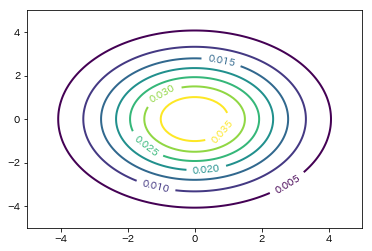

In [14]:
import scipy.stats as stats
import matplotlib.mlab as mlab

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
plt.figure
Z = mlab.bivariate_normal(X, Y, sigmax=2, sigmay=2)
CS = plt.contour(X, Y, Z, linewidths=2)
plt.clabel(CS,inline=1,fontsize=10)


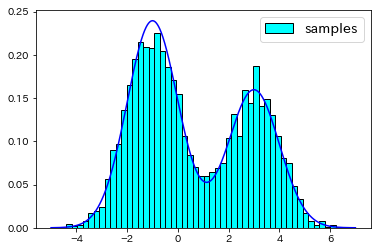

In [11]:
# 目的の分布（混合ガウス分布）のパラメータ
mu1 = -1.0
mu2 = 3.0
sigma1 = 1.0
sigma2 = 1.0
rate = 0.6

# 提案分布（ガウス分布）のパラメータ
sigma = 3.0

# 目的の分布
def p(x):
    pdf1 = stats.norm.pdf(x, loc=mu1, scale=sigma1)
    pdf2 = stats.norm.pdf(x, loc=mu2, scale=sigma2)
    return rate * pdf1 + (1.0 - rate) * pdf2

# 提案分布からサンプリングする関数
def sampling_q(mu):
    return stats.norm.rvs(loc=mu, scale=sigma)


def MH(iter_num = 10000):
    # サンプルを保持するリスト
    samples = []
    
    # 初期値x_0を提案分布からサンプリング
    # 初期状態なので、平均は0に
    x = sampling_q(0.0)
    samples.append(x)
    
    for t in range(iter_num):
        y = sampling_q(x)
        
        # uを一様分布からサンプリング
        u = stats.uniform.rvs()
        
        # 採択確率の計算
        acceptance_p = np.min([1.0, p(y) / p(x)])
        
        # 採択されたらyをx^(t+1)に
        if u <= acceptance_p:
            x = y
        
        samples.append(x)
        
    return np.array(samples)



def main():
    iter_num = 110000
    samples = MH(iter_num=iter_num)
    print_samples = samples[-10000:]
    
    plt.hist(print_samples, bins=50, color='aqua', normed=1, label='samples', ec='black')
    x = np.linspace(-5, 7, 1000)
    plt.plot(x, p(x), color='b')
    plt.legend(loc='best', prop={'size': 14})

    
main()

ステップ数による分布の変化

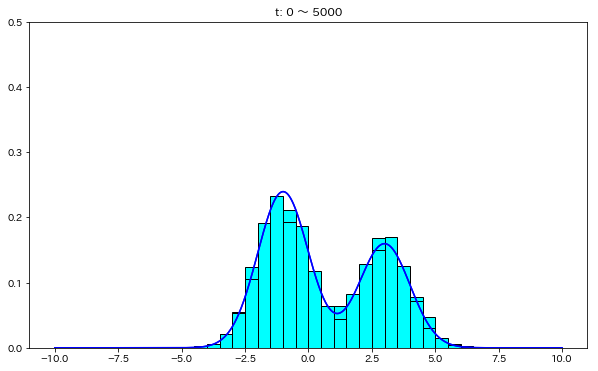

In [12]:
import scipy.stats as stats
import matplotlib.animation as anm
import pickle

# 目的の分布（混合ガウス分布）のパラメータ
mu1 = -1.0
mu2 = 3.0
sigma1 = 1.0
sigma2 = 1.0
rate = 0.6

# 提案分布（ガウス分布）のパラメータ
sigma = 3.0



# 目的の分布
def p(x):
    pdf1 = stats.norm.pdf(x, loc=mu1, scale=sigma1)
    pdf2 = stats.norm.pdf(x, loc=mu2, scale=sigma2)
    return rate * pdf1 + (1.0 - rate) * pdf2

# 提案分布からサンプリングする関数
def sampling_q(mu):
    return stats.norm.rvs(loc=mu, scale=sigma)

def MH(iter_num = 10000):
    # サンプルを保持するリスト
    samples = []
    
    # 初期値x_0を提案分布からサンプリング
    # 初期状態なので、平均は0に
    x = sampling_q(0.0)
    samples.append(x)
    
    for t in range(iter_num):
        y = sampling_q(x)
        
        # uを一様分布からサンプリング
        u = stats.uniform.rvs()
        
        # 採択確率の計算
        acceptance_p = np.min([1.0, p(y) / p(x)])
        
        # 採択されたらyをx^(t+1)に
        if u <= acceptance_p:
            x = y
        
        samples.append(x)
        
    return np.array(samples)


fig = plt.figure(figsize = (10, 6))
low = -10
high = 10
x = np.linspace(low, high, 1000)

def update(i, samples, every_plotsamples):
    if i != 0:
        # 現在描写されているグラフを消す
        plt.cla()
    
    start = i * every_plotsamples
    end = min(start + every_plotsamples, len(samples))
    
    plotsamples = samples[start: end]
    # サンプリング結果のプロット
    plt.hist(plotsamples, bins=40, range=(low, high),
        color='aqua',label='MH', ec='black', normed=1)
    
    x = np.linspace(low, high, 1000)
    plt.plot(x, p(x), color='blue',
         label='混合ガウス分布 mu1:{} mu2:{} sigma1&2:{}'\
             .format(mu1, mu2, sigma1))
    plt.ylim(0.0, 0.50)
    plt.title('t: {} 〜 {}'.format(start, end))


num_iter = 110000
samples = MH(num_iter)

"""
with open('mh-samples.ndarray', mode='wb') as f:
    pickle.dump(samples, f)

with open('mh-samples.ndarray', mode='rb') as f:
    samples = pickle.load(f)
"""

every_plotsamples = 5000
frames = num_iter // every_plotsamples
ani = anm.FuncAnimation(fig, update, fargs=(samples, every_plotsamples), 
                        interval = 500, frames = frames)

ani.save("mh.gif", writer = 'imagemagick')


In [13]:
from IPython.display import HTML
HTML('<img src="mh.gif">')

# ギブス・サンプリング


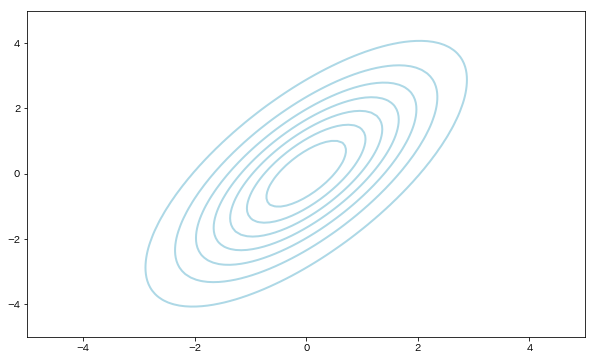

In [32]:
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.cm as cm

# ２変量ガウス分布のパラメータ
mu = [0, 0]
sigma = [[4.0, 2.0], [2.0, 4.0]]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
plt.figure(figsize=(10, 6))
Z = mlab.bivariate_normal(X, Y,sigmax=np.sqrt(sigma[0][1]),
                          sigmay=np.sqrt(sigma[1][1]),
                          sigmaxy=sigma[0][1])
plt.contour(X, Y, Z, linewidths=2, colors='lightblue')
#plt.clabel(CS,inline=1,fontsize=0)

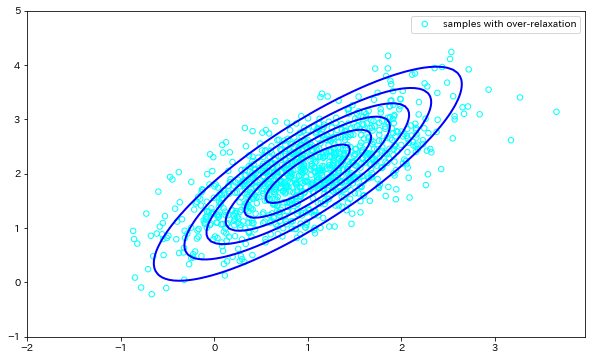

In [14]:
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.cm as cm

# 目的分布（２変量ガウス分布）のパラメータ
mu = np.array([1.0, 2.0], np.float32)
sigma = np.array([[1.0, 0.7], [0.7, 1.0]], np.float32)

# 確率変数の次元数
n_dim = len(mu)

# 事前分布のパラメータ（一様分布）
low = -1
high = 1

# 過剰緩和のパラメータ -1.0 < alpha < 1.0
alpha = 0.5

"""
def cal_params(i, xs, xs_next):
    sigma_delcol_i = np.delete(sigma, i, axis=1)
    A = np.delete(sigma_delcol_i, i, axis=0)
    vec_bt = np.delete(sigma[:, i], i)
    c = sigma[i][i]
    
    m0 = mu[i]
    vec_m = np.delete(mu, i).reshape(-1, 1)
    condition = np.hstack((xs_next, xs[i:]))
    t = np.delete(condition, i).reshape(-1, 1)
    
    mu_ans = m0 + np.dot(np.dot(vec_bt, np.linalg.inv(A)),
                         (t - vec_m))
    
    sigma_ans = c - np.dot(vec_bt,
                           np.dot(np.linalg.inv(A), vec_bt.reshape(-1,1)))
    
    return mu_ans.astype(np.float32)[0], sigma_ans.astype(np.float32)[0]
"""

def cal_params(i, xs, xs_next):
    idx = np.arange(len(sigma))
    b = np.where(idx != i)[0]
    
    x_b = np.hstack((xs_next, xs[i:]))[b].reshape(-1, 1)
    mu_b = mu[b].reshape(-1,1)
    
    sigma_aa = sigma[i, i]
    c = sigma[:, b]
    sigma_bb_inv = np.linalg.inv(sigma[b][:, b])
    sigma_ab = sigma[b, i]
    sigma_ba = sigma_ab.reshape(-1, 1)
    
    mu_ans = mu[i] + np.dot(sigma_ab,
                            np.dot(sigma_bb_inv, (x_b - mu_b)))
    
    sigma_ans = sigma_aa - np.dot(sigma_ab,
                                  np.dot(sigma_bb_inv, sigma_ba))
        
    return mu_ans[0], sigma_ans[0]


def gibbs_sampling(n_iter, burn_in):
    # burn in期間以降のサンプルを保持
    samples = []
    # burn in期間に捨てられたサンプルを保持
    burn_samples = []
    
    xs = [0.0, 0.0]
    burn_samples.append(xs)
    
    for step in range(n_iter):
        xs_next = []
        for i in range(n_dim):
            # xs内でi以外のサンプルを使って、ガウス分布のパラメータを計算
            this_mu, this_sigma = cal_params(i, xs, xs_next)
            if this_sigma < 0:
                print(this_sigma)
            # 条件付き確率からi番目のx_nextをサンプリング
            sample = stats.norm.rvs(loc=this_mu, scale=this_sigma)
            xs_next.append(sample)
        
        xs = xs_next
        
        # burn in期間でなければ、サンプリング結果を保持
        if step > burn_in:
            samples.append(xs_next)
        else:
            burn_samples.append(xs_next)
            
    return np.array(samples), np.array(burn_samples)


def gibbs_sampling_with_overrelaxation(n_iter, burn_in):
    # burn in期間以降のサンプルを保持
    samples = []
    # burn in期間に捨てられたサンプルを保持
    burn_samples = []
    
    xs = [0.0, 0.0]
    burn_samples.append(xs)
    
    for step in range(n_iter):
        xs_next = []
        for i in range(n_dim):
            # xs内でi以外のサンプルを使って、ガウス分布のパラメータを計算
            this_mu, this_sigma = cal_params(i, xs, xs_next)
            if this_sigma < 0:
                print(this_sigma)
            # 条件付き確率からi番目のx_nextをサンプリング
            _sample = stats.norm.rvs(loc=this_mu, scale=this_sigma)
            v = stats.norm.rvs()
            sample = this_mu + alpha * (_sample - this_mu) +\
                     this_sigma * np.sqrt(1 - alpha**2) * v
            xs_next.append(sample)
        
        xs = xs_next
        
        # burn in期間でなければ、サンプリング結果を保持
        if step > burn_in:
            samples.append(xs_next)
        else:
            burn_samples.append(xs_next)
            
    return np.array(samples), np.array(burn_samples)

def plot_gauss_distrib():
    x = np.linspace(-2, 3, 100)
    y = np.linspace(-1, 5, 100)

    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 6))
    Z = mlab.bivariate_normal(X, Y,
                              mux=mu[0],
                              muy=mu[1],
                              sigmax=np.sqrt(sigma[0][1]),
                              sigmay=np.sqrt(sigma[1][1]),
                              sigmaxy=sigma[0][1])
    plt.contour(X, Y, Z, linewidths=2, colors='b')

    
def main():
    n_iter = 3000
    burn_in = n_iter - 2000
    
    # samples, burn_samples = gibbs_sampling(n_iter, burn_in)
    samples, burn_samples = gibbs_sampling_with_overrelaxation(n_iter,
                                                               burn_in)
    print_samples = samples[-1000:]
    
    plot_gauss_distrib()
    plt.scatter(print_samples[:, 0], print_samples[:, 1], edgecolor='aqua',
                facecolor="none", marker='o', s=30,
                label='samples with over-relaxation')
    #plt.scatter(burn_samples[:, 0], burn_samples[:, 1], edgecolor='orange',
    #            facecolor="none", marker='o', s=30,
    #            label='samples in burn-in')
    
    #ans = stats.multivariate_normal.rvs(mean=mu, cov=sigma, size=1000)
    #plt.scatter(ans[:, 0], ans[:, 1], edgecolor='r',
    #            facecolor="none", marker='o', s=30,
    #            label='samples after burn-in')
    
    plt.legend(loc='best', prop={'size': 10})
    

main()


### 最初の20サンプルの推移

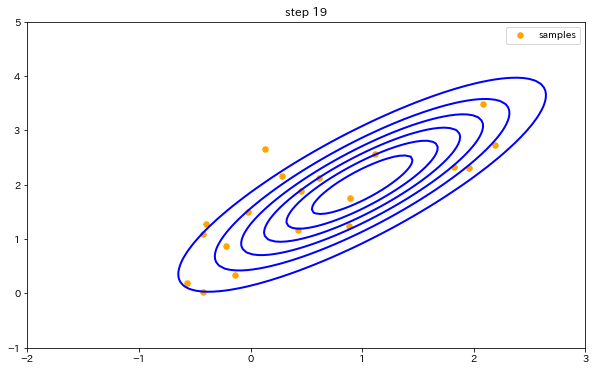

In [11]:
import matplotlib.animation as anm


fig = plt.figure(figsize = (10, 6))

def update(i, samples, X, Y, Z):
    if i != 0:
        # 現在描写されているグラフを消す
        plt.cla()
    
    plt.contour(X, Y, Z, linewidths=2, colors='b')
    plt.scatter(samples[0:i, 0], samples[0:i, 1],
                c='orange', marker='o', s=30,
                label='samples')
    plt.title('step {}'.format(i))
    plt.legend(loc='best', prop={'size': 10})

    
def main():
    n_iter = 1000
    burn_in = 0
    samples, burn_samples = gibbs_sampling(n_iter, burn_in)
    x = np.linspace(-2, 3, 100)
    y = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = mlab.bivariate_normal(X, Y,
                              mux=mu[0],
                              muy=mu[1],
                              sigmax=np.sqrt(sigma[0][1]),
                              sigmay=np.sqrt(sigma[1][1]),
                              sigmaxy=sigma[0][1])
    ani = anm.FuncAnimation(fig, update, fargs=(samples, X, Y, Z),
                            interval=500, frames=20)
    ani.save("gibbs.gif", writer = 'imagemagick')
    
main()


### 過剰緩和有りと無しの比較

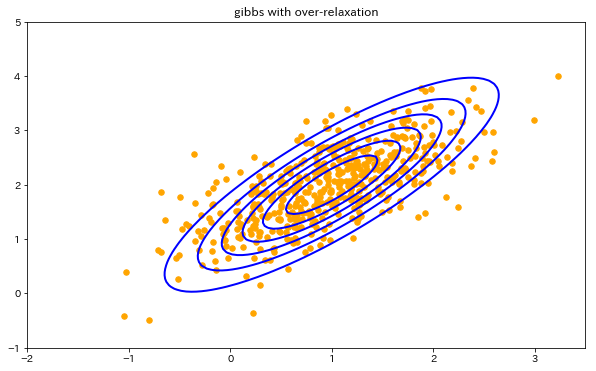

In [32]:
import matplotlib.animation as anm


fig = plt.figure(figsize = (10, 6))

def update(i, X, Y, Z):
    if i != 0:
        # 現在描写されているグラフを消す
        plt.cla()
    
    n_iter = 500
    burn_in = 0
    if i == 0:
        samples, burn_samples = gibbs_sampling(n_iter, burn_in)
        label = 'gibbs'
    else:
        samples, burn_samples = gibbs_sampling_with_overrelaxation(n_iter,
                                                                   burn_in)
        label = 'gibbs with over-relaxation'
    plt.contour(X, Y, Z, linewidths=2, colors='b')
    plt.scatter(samples[:, 0], samples[:, 1],
                c='orange', marker='o', s=30)
    plt.title(label)
    plt.ylim(-1, 5)
    plt.xlim(-2, 3.5)
    plt.legend(loc=2, prop={'size': 10})

    
def main():
    x = np.linspace(-2, 3, 100)
    y = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = mlab.bivariate_normal(X, Y,
                              mux=mu[0],
                              muy=mu[1],
                              sigmax=np.sqrt(sigma[0][1]),
                              sigmay=np.sqrt(sigma[1][1]),
                              sigmaxy=sigma[0][1])
    ani = anm.FuncAnimation(fig, update, fargs=(X, Y, Z),
                            interval=1000, frames=2)
    ani.save("compare_two_gibbs.gif", writer = 'imagemagick')
    
main()



In [33]:
from IPython.display import HTML
HTML('<img src="compare_two_gibbs.gif">')

# スライスサンプリング


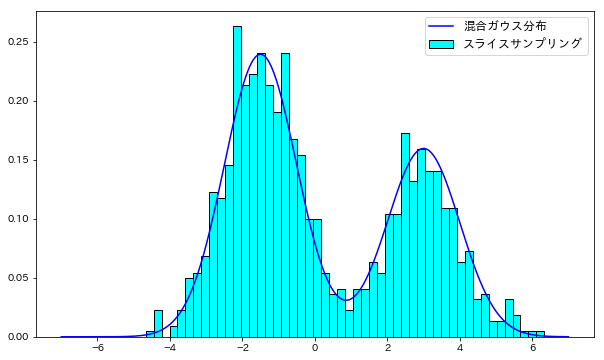

In [23]:
import scipy.stats as stats

# 目的の分布（混合ガウス分布）のパラメータ
mu1 = -1.5
mu2 = 3.0
sigma1 = 1.0
sigma2 = 1.0
rate = 0.6

# スライスサンプリングのパラメータ
window = 0.5


# 目的の分布
def p(x):
    pdf1 = stats.norm.pdf(x, loc=mu1, scale=sigma1)
    pdf2 = stats.norm.pdf(x, loc=mu2, scale=sigma2)
    return rate * pdf1 + (1.0 - rate) * pdf2


def plot_goal_distribution():
    x = np.linspace(-7, 7, 1000)
    plt.plot(x, p(x), c='b', label='混合ガウス分布')
    

def slice_sampling(n_iter):
    
    def expand(z, u):
        low = z - window * 0.5
        high = z + window * 0.5
        
        while p(low) > u:
            low -= window
        while p(high) > u:
            high += window
            
        return low, high
    
    def reduction(low, high, z_cand):
        if high - z_cand >= z_cand - low:
            low = z_cand
        else:
            high = z_cand
        
        return low, high
        
        
    samples = []
    # 初期点
    z = 0.0
    samples.append(z)
    for i in range(n_iter):
        u = np.random.uniform(0, p(z))
        # 領域を拡張
        low, high = expand(z, u)
        # 候補点をサンプリング
        z_cand = np.random.uniform(low, high, 1)
        
        # 候補点がスライスの中に含まれない場合は領域を狭めリサンプリング
        while p(z_cand) < u:
            low, high = reduction(low, high, z_cand)
            z_cand = np.random.uniform(low, high, 1)
        
        # 点を更新
        z = z_cand
        # サンプルを保持
        samples.append(z)
    
    return samples
            
    
def main():
    n_iter = 1000
    samples = slice_sampling(n_iter)
    
    plt.figure(figsize=(10, 6))
    plot_goal_distribution()
    plt.hist(samples, bins=50, color='aqua',
             label='スライスサンプリング', ec='black', normed=1)
    plt.legend(loc='best', prop={'size': 12})


main()

In [16]:
np.random.uniform(-1, -0.5, 1)

array([-0.52562566])